<a href="https://colab.research.google.com/github/willclopes/Portfolio-Data-Science/blob/master/16_ML_Analise_de_sentimentos_Reviews_Amazon_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de sentimentos de Reviews Amazon (Naive-Bayes)
---
By Willian C Lopes




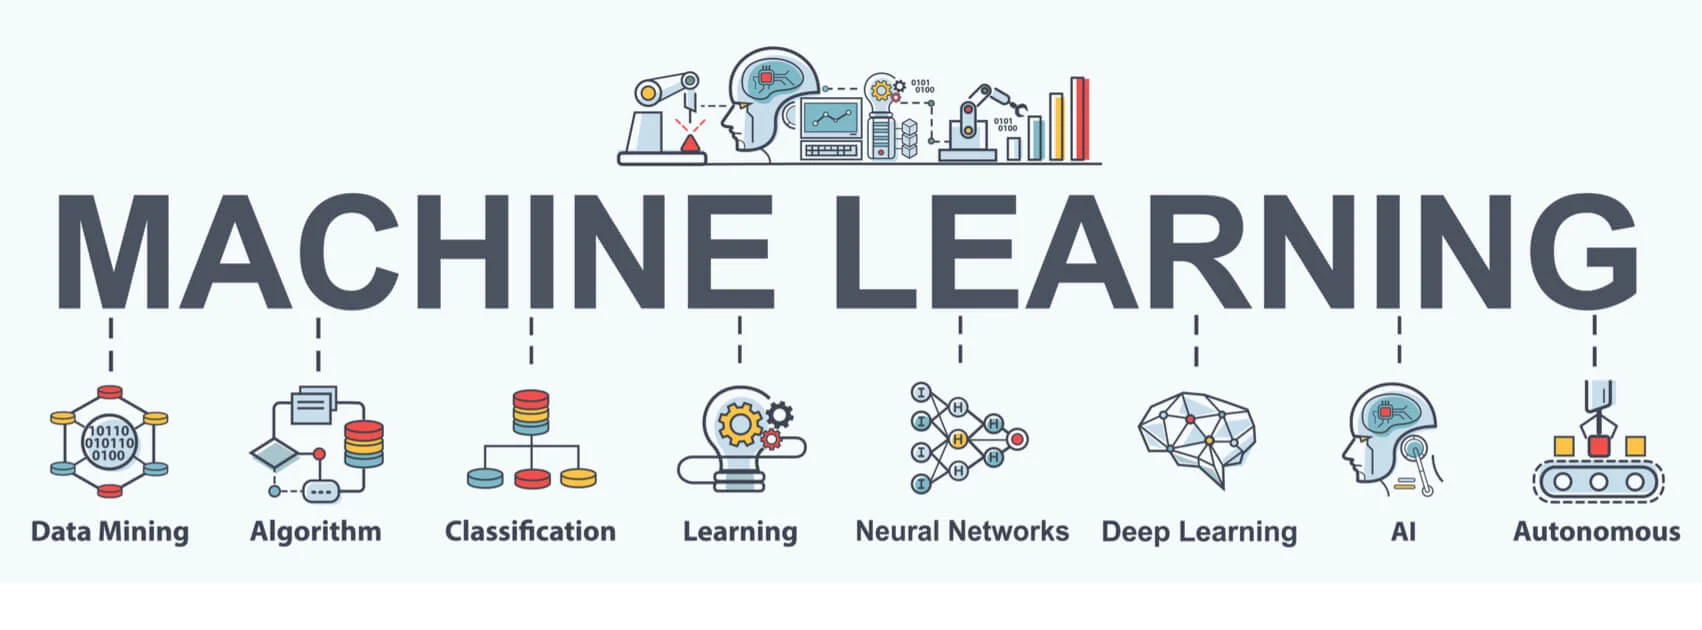

# **Introdução**

O aprendizado de máquina (ML) é o estudo de algoritmos de computador, que melhoram com a experiência e o uso de dados. Os algoritmos de aprendizado de máquina criam um modelo com base em dados de amostra (dados de treinamento) e fazem previsões ou decisões usando esse modelo sem serem programados para isso.

Os algoritmos de aprendizado de máquina têm uma ampla variedade de aplicações, como detecção de fraudes, filtragem de e-mail, etc. 

Pode-se pensar nos algoritmos de aprendizado de máquina como caindo em uma das três categorias principais - aprendizado supervisionado, aprendizado não supervisionado e a aprendizagem por reforço . A diferença é simples, mas muito importante.

- **Aprendizagem Supervisionada:** fazem uso de um conjunto de treinamento de dados de entrada e saída. O algoritmo aprende uma relação entre os dados de entrada e saída do conjunto de treinamento e, em seguida, usa essa relação para prever a saída de novos dados. Um dos objetivos de aprendizagem supervisionada mais comuns é a classificação. O aprendizado de classificação visa usar as informações aprendidas para prever a associação de uma determinada classe. O exemplo de pontuação de crédito representa o aprendizado de classificação, pois prevê pessoas inadimplentes.

- **A aprendizagem não supervisionad** visa fazer observações em dados onde não há resultado ou resultado conhecido, por meio da dedução de padrões e estruturas subjacentes nos dados. A aprendizagem por associação é uma das formas mais comuns de aprendizagem não supervisionada, em que o algoritmo procura associações entre os dados de entrada. O exemplo de análise da cesta de compras representa o aprendizado de associação.

- **A aprendizagem por reforço** é uma forma de aprendizagem por 'tentativa e erro' em que os dados de entrada estimulam o algoritmo a uma resposta e onde o algoritmo é 'punido' ou 'recompensado' dependendo se a resposta foi a desejada. A robótica e a tecnologia autônoma fazem grande uso dessa forma de aprendizado,

## **Contexto:**


A análise de sentimento (também conhecida como mineração de opinião ou IA de emoção ) é o uso de processamento de linguagem natural , análise de texto , linguística computacional e biometria para identificar, extrair, quantificar e estudar sistematicamente estados afetivos e informações subjetivas. A análise de sentimento é amplamente aplicada a materiais de voz do cliente , como avaliações e respostas a pesquisas, mídia online e social e materiais de saúde para aplicativos que variam de marketing a atendimento ao clienteà medicina clínica.

 Com o surgimento de modelos de linguagem profunda, como RoBERTa, também domínios de dados mais difíceis podem ser analisados, por exemplo, textos de notícias onde os autores normalmente expressam sua opinião/sentimento menos explicitamente. 

Uma tarefa básica na análise de sentimento é classificar a polaridade de um determinado texto no documento, frase ou nível de recurso/aspecto - se a opinião expressa em um documento, uma frase ou um recurso/aspecto de entidade é positiva, negativa ou neutra. A classificação avançada de sentimentos "além da polaridade" analisa, por exemplo, estados emocionais como prazer, raiva, nojo, tristeza, medo e surpresa. 





## **Declaração do problema**


Neste artigo vamos construir um classificador Naive-bayes que irá prever o sentimento de uma sentença. No nosso caso, o sentimento pode ser positivo ou negativo. Vamos prever se a avaliação é positiva ou negativa. 

Nosso target está rotulado com 1 (para positivo) ou 0 (para negativo)
As frases vêm de três sites/campos diferentes:

* imdb.com
* amazon.com
* yelp.com

Para cada site, existem 500 frases positivas e 500 negativas. Esses foram selecionados aleatoriamente para conjuntos de dados maiores de revisões.
Tentamos selecionar frases que tivessem uma conotação claramente positiva ou negativa, o objetivo era que não fossem selecionadas frases neutras.

* Amazon: contém avaliações e pontuações de produtos vendidos no amazon.com na categoria celulares e acessórios e faz parte do conjunto de dados coletados por McAuley e Leskovec. As pontuações estão em uma escala inteira de 1 a 5. Consideramos avaliações com pontuação de 4 e 5 como positivas e pontuações de 1 e 2 como negativas. Dividimos os dados aleatoriamente em duas metades de 50%, uma para treinamento e outra para teste, com 35.000 documentos em cada conjunto.

* IMDb: refere-se ao conjunto de dados de sentimento de crítica de filmes do IMDb originalmente introduzido por Maas et al. como referência para a análise de sentimentos. Este conjunto de dados contém um total de 100.000 resenhas de filmes postadas no imdb.com. Existem 50.000 avaliações não rotuladas e as 50.000 restantes são divididas em um conjunto de 25.000 avaliações para treinamento e 25.000 avaliações para teste. Cada uma das avaliações rotuladas tem um rótulo de sentimento binário, positivo ou negativo. Em nossos experimentos, treinamos apenas na parte rotulada do conjunto de treinamento.

* Yelp: refere-se ao conjunto de dados do desafio do conjunto de dados do Yelp do qual extraímos as avaliações do restaurante. As pontuações estão em uma escala inteira de 1 a 5. Consideramos novamente as avaliações com pontuações 4 e 5 como positivas e 1 e 2 como negativas. Geramos aleatoriamente uma divisão de treinamento e teste de 50-50, o que resultou em aproximadamente 300.000 documentos para cada conjunto. Sentenças: para cada um dos conjuntos de dados acima, extraímos e rotulamos manualmente 1.000 sentenças do conjunto de teste, com 50% de sentimento positivo e 50% de sentimento negativo. Essas sentenças são usadas apenas para avaliar nosso classificador em nível de instância para cada conjunto de dados3. Eles não são usados ​​para treinamento de modelo, para manter a consistência com nosso objetivo geral de aprender em nível de grupo e prever em nível de instância.

[Fonte](https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set)

**Como as resenhas do imdb e Yelp são em menores números e não nos forneceriam grandes precisões, usaremos as resenhas da amazon.**

### **- O que faremos?**

Nosso objetivo é prever a probabilidade de o sentimento ser positivo/negativo dada a sentença. Mas uma frase contém muitas palavras, então vamos dividir a frase em palavras e encontrar a probabilidade de sentimento para cada palavra e multiplicar tudo para obter o sentimento da frase. Aqui estamos assumindo que as palavras são condicionalmente independentes, o que é uma suposição ingênua, portanto, isso é chamado de classificador de bayes ingênuo.




### **- Descrição dos dados**

A seguir está a descrição dos recursos disponíveis no conjunto de dados.

1. review: é a resenha retirada do site
2. sentiment: polaridade do sentido da frase - 1 (para positivo) ou 0 (para negativo)





### **- Baixando os dados**

O conjunto de dados que será usado aqui fora obtido do Kaggle. Aqui, o conjunto de dados fornecido será analisado com base em todas as informações fornecidas.

Tem-se algumas opções para baixar a base de dados, entre elas estão:

- No [Kaggle](https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set)

- No meu [Github](https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/amazon-sentiment--sentences.txt)




---



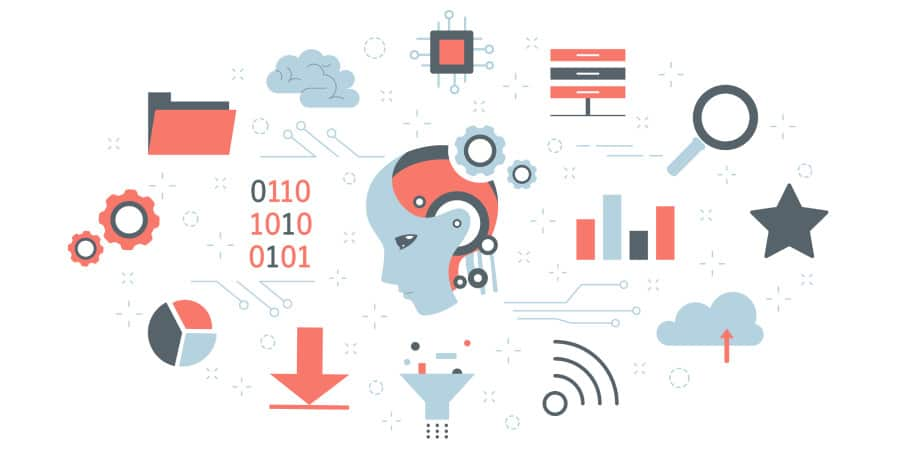

## Importar as Bibliotecas e o DataSet

In [ ]:
import numpy as np                           
import pandas as pd
import re
from nltk.corpus import stopwords
from random import randrange
from itertools import islice

**Como as resenhas do imdb e Yelp são em menores números e não nos forneceriam grandes precisões, usaremos as resenhas da amazon. Então, primeiro vamos importar as bibliotecas necessárias e carregar os dados.**

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/amazon-sentiment--sentences.txt", delimiter='\t', names=['review', 'sentiment'])

In [ ]:
#visualizando dados
data.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
#ver informações dos dados
data.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
#vendo a divisão de sentimentos
data['sentiment'].value_counts() 

1    500
0    500
Name: sentiment, dtype: int64

## Removendo Caracteres Desnecessários

In [ ]:
def text_filtering(text):
    #stop_words = list(stopwords.words('english'))
    stop_words=[]
    #stop_words=['those','is','and','a','at','these','for','these']
    text = text.replace('\t', '')
    text = text.replace('\n', '')
    text = text.replace('\r', '')                                          
    for word in text.split(" "):
        if word in stop_words:
            text=text.replace(word,'')
    text = text.rstrip() 
    regular_expression = '[^a-zA-z\s]'
    text = re.sub(regular_expression, '', text)
    return text
text_filtering("")

''

## Divisão de dados

Agora vamos dividir os dados em conjuntos de dados de treinamento, desenvolvimento e teste. o índice de divisão será de 90%,5%, 5% respectivamente.

In [ ]:
train_data = data[:int(0.9*len(data))]
test_and_dev_data = data[int(0.9*len(data)):]
                                                                       

dev_data=test_and_dev_data[:int(0.5 * len(test_and_dev_data))]
test_data=test_and_dev_data[int(0.5 * len(test_and_dev_data)):]

Agora vamos ver quantas avaliações positivas e negativas estão presentes nos conjuntos de dados de treinamento, desenvolvimento e teste.

In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     900 non-null    object
 1   sentiment  900 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ KB
None


In [ ]:
print(test_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 950 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50 non-null     object
 1   sentiment  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes
None


In [ ]:
train_data['sentiment'].value_counts() 

1    458
0    442
Name: sentiment, dtype: int64

In [ ]:
test_data['sentiment'].value_counts() 

0    33
1    17
Name: sentiment, dtype: int64

In [ ]:
dev_data['sentiment'].value_counts() 

1    25
0    25
Name: sentiment, dtype: int64

Agora vamos separar avaliações os reviews da nossa variável algo (target) em todos os conjuntos de dados.

In [ ]:
X_train = train_data['review']
y_train = train_data['sentiment']
# print(X_train)
# print(y_train)                                                      

X_dev = dev_data['review']
y_dev = dev_data['sentiment']
# print(X_dev)
# print(y_dev)

X_test = test_data['review']
y_test = test_data['sentiment']
# print(X_test)
# print(y_test)

## Baseline

Coisas simples primeiro, vamos calcular primeiro as probabilidades de cada classe, ou seja, as probabilidades de avaliações positivas e negativas.

In [ ]:
def cal_prior_probs(y_train):
    prior_probs = []
    count_0 = sum(y_train == 0)                                     #calculating prior probabilities
    prior_probs.append(count_0 / y_train.size)  
    count_1 = sum(y_train == 1)
    prior_probs.append(count_1 / y_train.size)    
    return prior_probs
prior_probs=cal_prior_probs(y_train)
print("Probabilidade anterior da classe de revisão negativa--",prior_probs[0] )
print("Probabilidade anterior da classe de revisão positiva--",prior_probs[1] )

Probabilidade anterior da classe de revisão negativa-- 0.4911111111111111
Probabilidade anterior da classe de revisão positiva-- 0.5088888888888888


## Construindo lista de vocabulário e dicionário de palavras

Agora vamos construir uma lista de vocabulário que contém todas as palavras nas reviews de treinamento, mas vamos omitir as palavras que têm frequência menor que 5. 

E também podemos ignorar algumas palavras como , “a”, “é”, “aqueles” , etc, o que não afetaria o sentimento. 

Podemos chamá-los de stop words. 

Vamos também construir um dicionário que contém as palavras(chaves) e sua frequência(valores), ou seja, o número de reviews em que a palavra apareceu. 

Este dicionário será útil durante o cálculo da probabilidade condicional. Portanto, a função para isso será semelhante a….

In [ ]:
def build_word_dict(data):
    word_freq = {}
    all_words=[]
    omit=[]
    for sentence in data:
            words=[]
            sentence = text_filtering(sentence)                               
            words=sentence.split(' ')
            for word in set(words) :
                word = word.lower()
                if word not in word_freq.keys():
                    word_freq[word] = 1
                    all_words.append(word)
                else:
                    word_freq[word] += 1
      

    return word_freq, all_words

    
       
allwords_freq,allwords_train=build_word_dict(X_train)
print(allwords_train)
allwords_freq



['here', 'way', 'by', 'me', 'us', 'i', 'it', 'converter', 'a', 'unless', 'plug', 'so', 'to', 'there', 'go', 'is', 'in', 'no', 'the', 'for', 'value', 'excellent', 'case', 'good', 'jawbone', 'great', '', 'conversations', 'lasting', 'more', 'minutesmajor', 'charger', 'than', 'problems', 'tied', 'mic', 'jiggle', 'have', 'get', 'volume', 'decent', 'line', 'right', 'up', 'or', 'if', 'then', 'dozen', 'you', 'several', 'imagine', 'sending', 'one', 'hundred', 'of', 'each', 'contacts', 'fun', 'them', 'owneryou', 'must', 'are', 'razr', 'this', 'needless', 'my', 'wasted', 'say', 'money', 'what', 'time', 'waste', 'and', 'sound', 'quality', 'was', 'going', 'extended', 'from', 'very', 'impressed', 'when', 'original', 'battery', 'he', 'started', 'notice', 'excessive', 'two', 'garbled', 'static', 'ft', 'mere', 'were', 'seperated', 'headset', 'though', 'odd', 'ear', 'not', 'design', 'at', 'all', 'as', 'clip', 'comfortable', 'who', 'blue', 'highly', 'phone', 'any', 'has', 'recommend', 'tooth', 'everyone'

{'here': 4,
 'way': 7,
 'by': 7,
 'me': 21,
 'us': 2,
 'i': 245,
 'it': 213,
 'converter': 1,
 'a': 169,
 'unless': 2,
 'plug': 11,
 'so': 31,
 'to': 146,
 'there': 11,
 'go': 6,
 'is': 189,
 'in': 80,
 'no': 25,
 'the': 365,
 'for': 106,
 'value': 5,
 'excellent': 26,
 'case': 26,
 'good': 71,
 'jawbone': 3,
 'great': 91,
 '': 102,
 'conversations': 3,
 'lasting': 2,
 'more': 18,
 'minutesmajor': 1,
 'charger': 14,
 'than': 25,
 'problems': 12,
 'tied': 1,
 'mic': 2,
 'jiggle': 1,
 'have': 62,
 'get': 16,
 'volume': 9,
 'decent': 4,
 'line': 3,
 'right': 11,
 'up': 22,
 'or': 22,
 'if': 29,
 'then': 14,
 'dozen': 1,
 'you': 54,
 'several': 6,
 'imagine': 1,
 'sending': 4,
 'one': 35,
 'hundred': 1,
 'of': 98,
 'each': 1,
 'contacts': 2,
 'fun': 1,
 'them': 12,
 'owneryou': 1,
 'must': 4,
 'are': 33,
 'razr': 5,
 'this': 186,
 'needless': 1,
 'my': 113,
 'wasted': 2,
 'say': 5,
 'money': 17,
 'what': 16,
 'time': 25,
 'waste': 13,
 'and': 243,
 'sound': 35,
 'quality': 46,
 'was': 72,


Vamos calcular a probabilidade dessas palavras

In [ ]:
#probabilidade de todas as palavras
allwords_freq,allwords_train=build_word_dict(X_train)                      
for word in allwords_freq:
        print(word,"--",allwords_freq[word],"     probabilidade de ",word,"  eh = ",allwords_freq[word]/len(train_data))
       

here -- 4      probabilidade de  here   eh =  0.0044444444444444444
way -- 7      probabilidade de  way   eh =  0.0077777777777777776
by -- 7      probabilidade de  by   eh =  0.0077777777777777776
me -- 21      probabilidade de  me   eh =  0.023333333333333334
us -- 2      probabilidade de  us   eh =  0.0022222222222222222
i -- 245      probabilidade de  i   eh =  0.2722222222222222
it -- 213      probabilidade de  it   eh =  0.23666666666666666
converter -- 1      probabilidade de  converter   eh =  0.0011111111111111111
a -- 169      probabilidade de  a   eh =  0.18777777777777777
unless -- 2      probabilidade de  unless   eh =  0.0022222222222222222
plug -- 11      probabilidade de  plug   eh =  0.012222222222222223
so -- 31      probabilidade de  so   eh =  0.034444444444444444
to -- 146      probabilidade de  to   eh =  0.1622222222222222
there -- 11      probabilidade de  there   eh =  0.012222222222222223
go -- 6      probabilidade de  go   eh =  0.006666666666666667
is -- 189

Portanto, se você observar o código build_word_dict(data), poderá ver uma função conhecida como text_filtering. Agora esta é a função que vai limpar cada frase de palavras de parada, novos caracteres de linha desnecessários, caracteres de tabulação, números, espaços. 

## Probabilidades Condicionais

Assim que os dicionários estiverem prontos, podemos calcular as probabilidades condicionais indicadas anteriormente no artigo. O código para fazer tudo isso é mostrado abaixo…

In [ ]:
def fit(train_data,X_train):

    train_pos_reviews=train_data.loc[train_data.sentiment==1].review
    pos_words_freq,pos_words=build_word_dict(train_pos_reviews)
    train_neg_reviews=train_data.loc[train_data.sentiment==0].review
    neg_words_freq,neg_words=build_word_dict(train_neg_reviews)

    neg_words_freq.pop('', None)                         
    neg_condi_prob={}
    for word in neg_words_freq:
        #print(word,"--",neg_words_freq[word],"      
        neg_condi_prob[word]=neg_words_freq[word]/len(train_neg_reviews) 
        
    pos_words_freq.pop('', None)
    pos_condi_prob={}
    for word in pos_words_freq:
        #print(word,"--",pos_words_freq[word],"     
        pos_condi_prob[word]=pos_words_freq[word]/len(train_pos_reviews)
    
    
    return pos_condi_prob,neg_condi_prob
    
pos_condi_prob_train,neg_condi_prob_train=fit(train_data,X_train)   

As probabilidades condicionais serão..

In [ ]:
#principais palavras positivas


dict1 = pos_condi_prob_train
sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get,reverse=True)  

for w in sorted_keys:
    sorted_dict[w] = dict1[w]

def take(n, iterable):
    
    return list(islice(iterable, n))

n_items_pos = take(10, sorted_dict.items())
print(n_items_pos)

[('the', 0.37554585152838427), ('and', 0.3231441048034934), ('i', 0.27292576419213976), ('is', 0.24017467248908297), ('it', 0.22270742358078602), ('this', 0.21397379912663755), ('great', 0.18995633187772926), ('a', 0.18777292576419213), ('phone', 0.1703056768558952), ('to', 0.14847161572052403)]


In [ ]:
#principais palavras negativas


dict1 = neg_condi_prob_train
sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get,reverse=True)  

for w in sorted_keys:
    sorted_dict[w] = dict1[w]
    
n_items_neg = take(10, sorted_dict.items())
print(n_items_neg)

[('the', 0.43665158371040724), ('i', 0.27149321266968324), ('it', 0.251131221719457), ('and', 0.2149321266968326), ('this', 0.19909502262443438), ('not', 0.19457013574660634), ('a', 0.18778280542986425), ('is', 0.17873303167420815), ('to', 0.17647058823529413), ('phone', 0.14027149321266968)]


Finalmente, como temos tudo para prever o sentimento, vamos prever e ver a precisão. 

In [ ]:
def score(real, prediction):
    count = 0
    for i in range(len(real)):                                #calculating a acuracia
        if real[i] == prediction[i]:
            count+=1
    accuracy=count/len(real)*100
    return accuracy

In [ ]:
def pred(data,ans,pos_condi_prob,neg_condi_prob):
    y_preds=[]
    for sentence in data:
        sentence=text_filtering(sentence)
        pos_lik=1                                          #making the predictions 
        neg_lik=1
        for word in sentence.split(' '):
            word=word.lower()
            if word not in pos_condi_prob.keys():
                pos_condi_prob[word]=0
            if word not in neg_condi_prob.keys():
                neg_condi_prob[word]=0
            pos_lik*=pos_condi_prob[word]
            neg_lik*=neg_condi_prob[word]
        pos_posterior=pos_lik*prior_probs[1]
        neg_posterior=neg_lik*prior_probs[0]
        if pos_posterior>neg_posterior:
            y_preds.append(1)
        else:
            y_preds.append(0)
    
    return score(ans.tolist(),y_preds)
print("Precisão nos dados de treinamento antes do smoothing --",pred(X_train,y_train,pos_condi_prob_train,neg_condi_prob_train) )   
print("Precisão nos dados de treinamento depois do smoothing--",pred(X_dev,y_dev,pos_condi_prob_train,neg_condi_prob_train))
print("Precisão nos dados de teste antes do smoothing--",pred(X_test,y_test,pos_condi_prob_train,neg_condi_prob_train))

Precisão nos dados de treinamento antes do smoothing -- 93.33333333333333
Precisão nos dados de treinamento depois do smoothing-- 54.0
Precisão nos dados de teste antes do smoothing-- 74.0


Podemos observar que nossos dados de teste possuem uma precisão de 70 %.

## Validação cruzada de 5 dobras

Agora vamos aplicar a validação cruzada 5 dobras no conjunto de desenvolvimento e observar as precisões. Na validação cruzada de 5 dobras, dividimos os dados em 5 metades e usamos 4 metades para treinamento e uma metade para teste, repetimos esse processo até que cada metade seja testada.

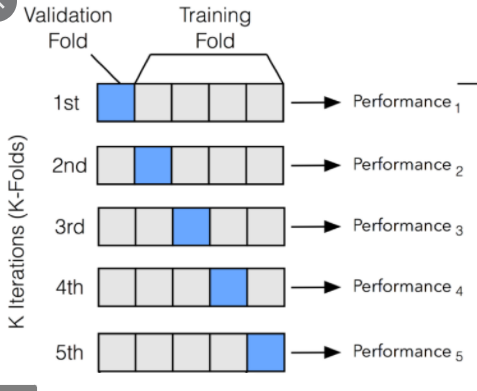

In [ ]:
#k- fold cross validation
def k_fold_acc(dataset):         # k = 5
    
    dat_split=np.array_split(dataset,5)
    review_split=np.array_split(dataset['review'],5)
    senti_split=np.array_split(dataset['sentiment'],5)
    fold_acc=[]
    
    
    arrd1= np.concatenate((dat_split[1],dat_split[2],dat_split[3],dat_split[4]))
    arrx1=np.concatenate((review_split[1],review_split[2],review_split[3],review_split[4]))
    dfd1 = pd.DataFrame(arrd1, columns = ['review','sentiment'])
    dfx1= df = pd.DataFrame(arrx1, columns = ['review'])
    pos_condi_prob_dev,neg_condi_prob_dev=fit(dfd1,dfx1)
    acc=pred(review_split[0],senti_split[0],pos_condi_prob_dev,neg_condi_prob_dev)    
    fold_acc.append(acc)

    
    arrd2= np.concatenate((dat_split[0],dat_split[2],dat_split[3],dat_split[4]))
    arrx2=np.concatenate((review_split[0],review_split[2],review_split[3],review_split[4]))
    dfd2 = pd.DataFrame(arrd2, columns = ['review','sentiment'])
    dfx2= df = pd.DataFrame(arrx2, columns = ['review'])
    pos_condi_prob_dev,neg_condi_prob_dev=fit(dfd2,dfx2)
    acc=pred(review_split[1],senti_split[1],pos_condi_prob_dev,neg_condi_prob_dev)    
    fold_acc.append(acc)
    
    arrd3= np.concatenate((dat_split[0],dat_split[1],dat_split[3],dat_split[4]))
    arrx3=np.concatenate((review_split[0],review_split[1],review_split[3],review_split[4]))
    dfd3 = pd.DataFrame(arrd3, columns = ['review','sentiment'])
    dfx3= df = pd.DataFrame(arrx3, columns = ['review'])
    pos_condi_prob_dev,neg_condi_prob_dev=fit(dfd3,dfx3)
    acc=pred(review_split[2],senti_split[2],pos_condi_prob_dev,neg_condi_prob_dev)    
    fold_acc.append(acc)
    
    arrd4= np.concatenate((dat_split[0],dat_split[1],dat_split[2],dat_split[4]))
    arrx4=np.concatenate((review_split[0],review_split[1],review_split[2],review_split[4]))
    dfd4 = pd.DataFrame(arrd4, columns = ['review','sentiment'])
    dfx4= df = pd.DataFrame(arrx4, columns = ['review'])
    pos_condi_prob_dev,neg_condi_prob_dev=fit(dfd4,dfx4)
    acc=pred(review_split[3],senti_split[3],pos_condi_prob_dev,neg_condi_prob_dev)    
    fold_acc.append(acc)
    

    arrd5= np.concatenate((dat_split[0],dat_split[1],dat_split[2],dat_split[3]))
    arrx5=np.concatenate((review_split[0],review_split[1],review_split[2],review_split[3]))
    dfd5 = pd.DataFrame(arrd5, columns = ['review','sentiment'])
    dfx5= df = pd.DataFrame(arrx5, columns = ['review'])
    pos_condi_prob_dev,neg_condi_prob_dev=fit(dfd5,dfx5)
    acc=pred(review_split[4],senti_split[4],pos_condi_prob_dev,neg_condi_prob_dev)    
    fold_acc.append(acc)

    return fold_acc
        
        
   
print(" \nVamos ver as precisões de cada dobra e também a média. \n")   
    
l=k_fold_acc(dev_data)   
print(l)  
print("Média Precisão de validação cruzada--", sum(l)/len(l) )

 
Vamos ver as precisões de cada dobra e também a média. 

[50.0, 60.0, 50.0, 60.0, 40.0]
Média Precisão de validação cruzada-- 52.0


## Melhorar a precisão

Agora vamos tentar aumentar nossa precisão de teste de 70%. Em primeiro lugar, como nosso conjunto de dados é pequeno, omitir palavras de menor frequência e remover as stopwords não seria proveitoso. Então vamos evitar isso e prever o sentimento.

In [ ]:
train_pos_reviews=train_data.loc[train_data.sentiment==1].review
train_neg_reviews=train_data.loc[train_data.sentiment==0].review

In [ ]:
pos_words_freq,pos_words=build_word_dict(train_pos_reviews)
neg_words_freq,neg_words=build_word_dict(train_neg_reviews)

## Smoothing

Ao testar o conjunto de dados, surgirão situações em que uma palavra pode não estar presente no conjunto de dados de treinamento, ou seja, uma palavra pode não estar presente em revisões positivas ou negativas. Nesse caso, antes colocamos zero nesse lugar, vamos aplicar o conceito de Smoothing e evitar essa probabilidade zero. Vamos colocar a estimativa de laplace para isso.

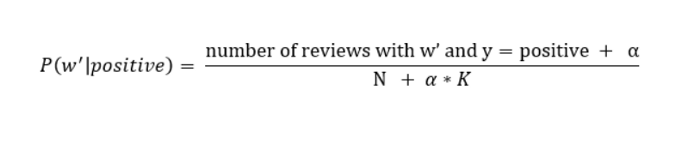

Aqui, alfa representa o parâmetro de "suavização" (vamos colocar alfa=1), K representa o número de dimensões (recursos) nos dados e N representa o número de avaliações com y=positivo. Fazemos a mesma coisa com os sentimentos negativos também. 

In [ ]:
def fit_with_smoothing(train_data,X_train):
    allwords_freq,allwords_train=build_word_dict(X_train)
    train_pos_reviews=train_data.loc[train_data.sentiment==1].review
    pos_words_freq,pos_words=build_word_dict(train_pos_reviews)
    train_neg_reviews=train_data.loc[train_data.sentiment==0].review
    neg_words_freq,neg_words=build_word_dict(train_neg_reviews)

    neg_words_freq.pop('', None)                                            
    neg_condi_prob={}
    for word in neg_words_freq:
        #print(word,"--",neg_words_freq[word],"      
        neg_condi_prob[word]=(neg_words_freq[word]+1)/(len(train_neg_reviews) +len(pos_words) )
        
    pos_words_freq.pop('', None)
    pos_condi_prob={}
    for word in pos_words_freq:
        #print(word,"--",pos_words_freq[word],"      
        pos_condi_prob[word]=(pos_words_freq[word]+1)/(len(train_pos_reviews) + len(neg_words))
    
    
    return pos_condi_prob,neg_condi_prob
    
pos_condi_prob,neg_condi_prob=fit_with_smoothing(train_data,X_train)    

Agora vamos realizar a previsão e ver a precisão dos dados de teste.

In [ ]:
def pred(data,ans):
    y_preds=[]
    for sentence in data:
        sentence=text_filtering(sentence)
        pos_lik=1
        neg_lik=1
        
        for word in sentence.split(' '):
            word=word.lower()                                        #predictions with smoothing
            if word not in pos_condi_prob.keys():
                pos_condi_prob[word]=1/(len(train_pos_reviews)+len(pos_words))
            if word not in neg_condi_prob.keys():
                neg_condi_prob[word]=1/(len(train_neg_reviews)+len(neg_words))
            pos_lik*=pos_condi_prob[word]
            neg_lik*=neg_condi_prob[word]
        pos_posterior=pos_lik*prior_probs[1]
        neg_posterior=neg_lik*prior_probs[0]
        if pos_posterior>neg_posterior:
            y_preds.append(1)
        else:
            y_preds.append(0)
    
    return score(ans.tolist(),y_preds)
print("Precisão nos dados de treinamento após smoothing--",pred(X_train,y_train) )   
print("Precisão nos dados de desenvolvimento após smoothing--",pred(X_dev,y_dev))
print("Precisão nos dados de teste após smoothing--",pred(X_test,y_test))

Precisão nos dados de treinamento após smoothing-- 95.66666666666667
Precisão nos dados de desenvolvimento após smoothing-- 80.0
Precisão nos dados de teste após smoothing-- 82.0


## Conclusão

Podemos ver que há um aumento na precisão do teste de 70% para 82%. Portanto, é claramente evidente que o smooting melhorou o desempenho do nosso classificador. A precisão final do classificador Naivebaies para análise de sentimento é de 82%.



---


## Referências

* https://pandas.pydata.org/
* https://seaborn.pydata.org/
* https://medium.com
* https://www.kaggle.com
* https://towardsdatascience.com/
* https://medium.com/@nagam808sury
* https://github.com/NagamSurya/
* https://en.wikipedia.org/wiki/Sentiment_analysis
* https://medium.com/analytics-vidhya/
* https://www.analyticsvidhya.com/blog/





# Contatos


[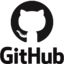](https://github.com/willclopes)


---


[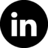 ](https://www.linkedin.com/in/willclopes/)





---

[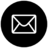](willclopes@gmail.com)

 



